<a href="https://colab.research.google.com/github/AishaEvering/PyTorch_Exercises/blob/main/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [149]:
# Check for GPU
!nvidia-smi

Mon Apr 29 22:12:16 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P0              29W /  70W |    193MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [150]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.2.1+cu121


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

*   Autonomous vehicles
  * Helps vehicles detect and recognize traffic lights, signs, pedestrians, lanes, and other vehicles to enable safe driving
*   Healthcare
  * Medical image analysis helps medical professionals make faster and more accurate diagnoses by creating visualizations of organs and tissues.
* Agriculture
  * Helps with farming aids, crop coverage, yield mapping, disease detection, and harvesting



## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

- Overfitting is when a model learns the training data too well, including its noise and outliers, resulting in poor performance on unseen data.
- Underfitting is when a model is too simple to learn the underlying patterns in the training data, resulting in poor performance on training data and unseen data.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.



*   Early Stopping: Stop the training process before the model starts capturing noise from the data.
*   Cross-Validation: a technique for evaluating ML models by training several ML models on subsets of the available input and evaluating them on the complementray subset of the data.
*   Regularization: a group of methods that forces the learning algorithms to make a model simpler.  Applying the regularization technique may slightly increase the bias but slightly reduces the variance. In this technique, we modify the objective function by adding the penalizing term, which has a higher value with a more complex model.



## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [151]:
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [152]:
train_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None,
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None,
)

print(f"Train Data Len: {len(train_data)}, Test Data Len: {len(test_data)}")

Train Data Len: 60000, Test Data Len: 10000


In [153]:
img, lbl = train_data[0]
img.shape, lbl

(torch.Size([1, 28, 28]), 5)

## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [154]:
class_names = train_data.classes
class_names, type(train_data)

(['0 - zero',
  '1 - one',
  '2 - two',
  '3 - three',
  '4 - four',
  '5 - five',
  '6 - six',
  '7 - seven',
  '8 - eight',
  '9 - nine'],
 torchvision.datasets.mnist.MNIST)

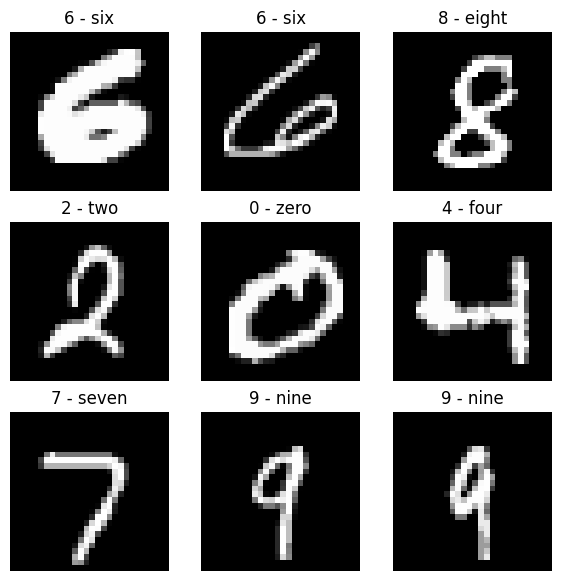

In [155]:
torch.manual_seed(42)

fig = plt.figure(figsize=(7,7))

rows, cols = 3, 3

for i in range(1, rows * cols + 1):

  random_idx = torch.randint(0, len(train_data), size=[1]).item()

  image, label = train_data[random_idx]

  fig.add_subplot(rows, cols, i)
  plt.imshow(image.squeeze(), cmap="gray") # removing the color channel dimension, it's in the wrong place
  plt.title(f"{class_names[label]}")
  plt.axis(False);

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [156]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size = BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7d22f08bc2b0>,
 <torch.utils.data.dataloader.DataLoader at 0x7d22f08bd4e0>)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [157]:
# recreating TinyVGG
class MNISTModelV0(nn.Module):
  '''
    Model that replicates the TinyVGG model from the CNN explainer website
    https://poloclub.github.io/cnn-explainer/
  '''

  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()

    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape, out_channels=hidden_units,
                  kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,
                  kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,
                  kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,
                  kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self, x: torch.Tensor):
    x = self.conv_block_1(x)
    #print(f'Conv Block 1 Output: {x.shape}')
    x = self.conv_block_2(x)
    #print(f'Conv Block 2 Output: {x.shape}')
    x = self.classifier(x)
    #print(f'Classifier Output: {x.shape}')
    return x

In [158]:
model = MNISTModelV0(input_shape=1,
                      hidden_units=10,
                      output_shape=len(class_names))

In [159]:
# attempt to run rand dummy image through model to look at the output shapes
#rand_image_tensor = torch.randn(size=(1,28,28))
#model0(rand_image_tensor.to(device))

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [238]:
try:
  import torchmetrics
  from torchmetrics.classification import MulticlassAccuracy
  print(f"torchmetrics ver: {torchmetrics.__version__}")
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics
  from torchmetrics.classification import MulticlassAccuracy
  print(f"torchmetrics ver: {torchmetrics.__version__}")

torchmetrics ver: 1.3.2


In [160]:
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device: torch.device = None):
  '''
  Prints difference between start and end time
  '''

  total_time = end - start

  print(f"Train time on {device}: {total_time:.3f} seconds")

  return total_time

In [242]:
def train_step(model: nn.Module, loss_fn: nn.Module, accuracy_fn,
               optimizer: torch.optim.Optimizer,
               data_loader: torch.utils.data.DataLoader,
               device: torch.device=device):
  '''
  Performs training step with model
  '''

  train_loss, train_acc = 0, 0

  # set training mode
  model.train()

  # loop through batches
  for X, y in data_loader:

    # put data in target device
    X, y = X.to(device), y.to(device)

    # forward pass
    y_logits = model(X)

    # calculate loss
    loss = loss_fn(y_logits, y)
    train_loss += loss # accumulate train loss

    # calculate accuracy
    train_acc += accuracy_fn(torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1), y)

    optimizer.zero_grad()

    # backward pass
    loss.backward()

    # gradient descent
    optimizer.step()

  # device total train loss and accuracy by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  print(f"\nTrain loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [243]:
def test_step(model: nn.Module, loss_fn: nn.Module, accuracy_fn,
              data_loader: torch.utils.data.DataLoader, device: torch.device = device):

  '''
  Performs testing step with model
  '''
  loss, acc = 0, 0

  # put model in eval mode
  model.eval()

  # turn on inference mode
  with torch.inference_mode():

    # for each batch
    for X, y in data_loader:

      # put data in target device
      X, y = X.to(device), y.to(device)

      # foward pass
      y_logits = model(X)

      # calculate loss
      loss += loss_fn(y_logits, y)

      # calculate accuracy
      acc += accuracy_fn(torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1), y)

    # calculate the test loss on average
    loss /= len(data_loader)

    # calculate the test accuracy on average
    acc /= len(data_loader)

    print(f"\nTest Loss: {loss:.5f} | Test acc: {acc:.2f}%")

In [244]:
model_on_cpu = MNISTModelV0(input_shape=1,
                      hidden_units=10,
                      output_shape=len(class_names)).to("cpu")

loss_fn  = nn.CrossEntropyLoss() # using CrossEntropyLoss because this is a multi-class classification model
optimizer = torch.optim.SGD(params=model_on_cpu.parameters(), lr=0.1) # using Stochastic Gradient Descent
accuracy_fn = MulticlassAccuracy(num_classes=len(class_names))

torch.manual_seed(42)

from timeit import default_timer as timer
start_time_on_cpu = timer()

epochs=5

for epoch in tqdm(range(epochs)):
  print(f"\nEpoch: {epoch}\n----------")

  train_step(model=model_on_cpu, loss_fn=loss_fn, accuracy_fn=accuracy_fn,
             optimizer=optimizer, data_loader=train_dataloader,
             device="cpu")

  test_step(model=model_on_cpu, loss_fn=loss_fn, accuracy_fn=accuracy_fn,
            data_loader=test_dataloader, device="cpu")

end_time_on_cpu = timer()

total_train_on_cpu = print_train_time(start=start_time_on_cpu,
                                        end=end_time_on_cpu,
                                        device="cpu")

  0%|          | 0/5 [00:00<?, ?it/s]


Epoch: 0
----------

Train loss: 0.40891 | Train acc: 0.78%

Test Loss: 0.09532 | Test acc: 0.88%

Epoch: 1
----------

Train loss: 0.09362 | Train acc: 0.86%

Test Loss: 0.06601 | Test acc: 0.89%

Epoch: 2
----------

Train loss: 0.07429 | Train acc: 0.87%

Test Loss: 0.05475 | Test acc: 0.90%

Epoch: 3
----------

Train loss: 0.06418 | Train acc: 0.87%

Test Loss: 0.06459 | Test acc: 0.90%

Epoch: 4
----------

Train loss: 0.05730 | Train acc: 0.88%

Test Loss: 0.05718 | Test acc: 0.90%
Train time on cpu: 228.891 seconds


In [246]:
model_on_gpu = MNISTModelV0(input_shape=1,
                      hidden_units=10,
                      output_shape=len(class_names)).to(device)

loss_fn  = nn.CrossEntropyLoss() # using CrossEntropyLoss because this is a multi-class classification model
optimizer = torch.optim.SGD(params=model_on_gpu.parameters(), lr=0.1) # using Stochastic Gradient Descent
accuracy_fn = MulticlassAccuracy(num_classes=len(class_names)).to(device)

torch.manual_seed(42)

from timeit import default_timer as timer
start_time_on_gpu = timer()

epochs=5

for epoch in tqdm(range(epochs)):
  print(f"\nEpoch: {epoch}\n----------")

  train_step(model=model_on_gpu, loss_fn=loss_fn, accuracy_fn=accuracy_fn,
             optimizer=optimizer, data_loader=train_dataloader,
             device=device)

  test_step(model=model_on_gpu, loss_fn=loss_fn, accuracy_fn=accuracy_fn,
            data_loader=test_dataloader, device=device)

end_time_on_gpu = timer()

total_train_on_gpu = print_train_time(start=start_time_on_gpu,
                                        end=end_time_on_gpu,
                                        device=device)

  0%|          | 0/5 [00:00<?, ?it/s]


Epoch: 0
----------

Train loss: 0.48051 | Train acc: 0.74%

Test Loss: 0.07546 | Test acc: 0.89%

Epoch: 1
----------

Train loss: 0.07713 | Train acc: 0.85%

Test Loss: 0.04653 | Test acc: 0.90%

Epoch: 2
----------

Train loss: 0.05651 | Train acc: 0.87%

Test Loss: 0.05260 | Test acc: 0.90%

Epoch: 3
----------

Train loss: 0.04593 | Train acc: 0.88%

Test Loss: 0.04734 | Test acc: 0.91%

Epoch: 4
----------

Train loss: 0.03974 | Train acc: 0.88%

Test Loss: 0.04173 | Test acc: 0.91%
Train time on cuda: 75.035 seconds


In [247]:
print(f"GPU Model trained {(total_train_on_cpu - total_train_on_gpu):.2f} seconds faster.")

GPU Model trained 153.86 seconds faster.


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [299]:
def get_random_samples(count=9, data=test_data):
  import random

  test_samples = []
  test_labels = []

  for sample, label in random.sample(list(data), k=count):
    test_samples.append(sample)
    test_labels.append(label)

  return test_samples, test_labels

In [225]:
from tqdm.auto import tqdm

def make_predictions(model:nn.Module, samples, device=device):
  pred_probs = []

  # make sure model is on proper device
  model.to(device)

  # put in eval mode
  model.eval()

  with torch.inference_mode():
    for sample in tqdm(samples, desc="Making predictions...."):

      # add a batch dimension
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # forward pass
      pred_logit = model(sample)

      # get prediction probability
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # put probs on cpu, will need this for plotting later
      pred_probs.append(pred_prob.cpu())

  pred_probs = torch.stack(pred_probs)
  pred_classes = pred_probs.argmax(dim=1)

  return pred_probs, pred_classes

In [248]:
# make predictions on gpu model because it's good practice
on_gpu_samples, on_gpu_labels = get_random_samples()
pred_probs_on_gpu, pred_classes_on_gpu = make_predictions(model=model_on_gpu, samples=on_gpu_samples, device=device)
pred_probs_on_gpu, pred_classes_on_gpu

Making predictions....:   0%|          | 0/9 [00:00<?, ?it/s]

(tensor([[1.3024e-07, 1.9564e-04, 9.9009e-01, 2.3928e-04, 4.1767e-12, 1.8760e-10,
          2.3589e-08, 2.3718e-09, 9.4736e-03, 3.4615e-08],
         [2.9825e-08, 9.9937e-01, 2.9516e-07, 8.5575e-08, 1.0063e-04, 4.6884e-09,
          5.2839e-07, 5.2368e-04, 1.5030e-06, 3.0927e-07],
         [8.8669e-01, 4.8550e-07, 7.6581e-05, 1.7927e-05, 1.0241e-07, 4.3756e-04,
          1.0628e-01, 1.4556e-09, 6.4993e-03, 9.3515e-07],
         [2.7061e-09, 7.5079e-05, 9.9992e-01, 8.5599e-07, 1.8630e-12, 1.5052e-14,
          3.0719e-13, 2.1631e-06, 6.3725e-07, 2.9436e-10],
         [6.6782e-12, 1.3622e-09, 2.0421e-10, 1.6749e-10, 9.9999e-01, 2.3309e-07,
          4.1017e-08, 4.0053e-09, 4.4239e-08, 1.0422e-05],
         [1.3141e-08, 1.1996e-09, 6.1865e-06, 1.2806e-04, 5.5714e-12, 2.8677e-09,
          3.2270e-15, 9.9984e-01, 1.5895e-10, 2.3231e-05],
         [7.5648e-11, 1.5402e-09, 1.0000e+00, 1.4587e-09, 1.4388e-14, 2.7785e-16,
          8.9264e-14, 4.2728e-11, 1.7162e-10, 2.7310e-13],
         [9.8

In [309]:
def plot_predictions(pred_classes, samples, labels, class_names=class_names, rows=3, cols=3):
  fig = plt.figure(figsize=(8,8))

  for i, sample in enumerate(samples):

    plt.subplot(rows, cols, i + 1)

    plt.imshow(sample.squeeze(), cmap="gray")

    pred_label = class_names[pred_classes[i]]

    truth_label = class_names[labels[i]]

    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g")
    else:
      plt.title(title_text, fontsize=10, c="r")

    plt.axis(False)

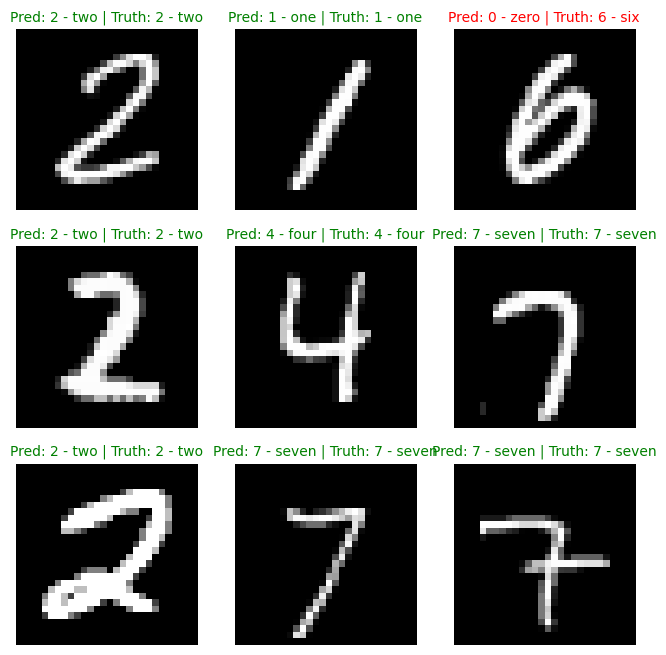

In [254]:
plot_predictions(pred_classes_on_gpu, on_gpu_samples, on_gpu_labels)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [256]:
# make predictions on all test data
from tqdm.auto import tqdm

y_preds = []

# put in eval mode
model_on_gpu.eval()

with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions...."):

    # put data on proper device
    X, y = X.to(device), y.to(device)

    # forward pass
    pred_logits = model_on_gpu(X)

    # turn logits to prediction lables
    y_pred = torch.softmax(pred_logits.squeeze(), dim=0).argmax(dim=1)

    y_preds.append(y_pred.cpu())

y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making predictions....:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([7, 2, 1,  ..., 4, 5, 6])

In [257]:
len(y_pred_tensor)

10000

In [258]:
try:
  import mlxtend
  print(f"mlxtend ver: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split('.')[1]) >= 19, 'mlxtend version should be 0.19 or higher'
except:
  !pip install -U mlxtend
  import mlxtend
  print(f"mlxtend ver: {mlxtend.__version__}")

mlxtend ver: 0.22.0


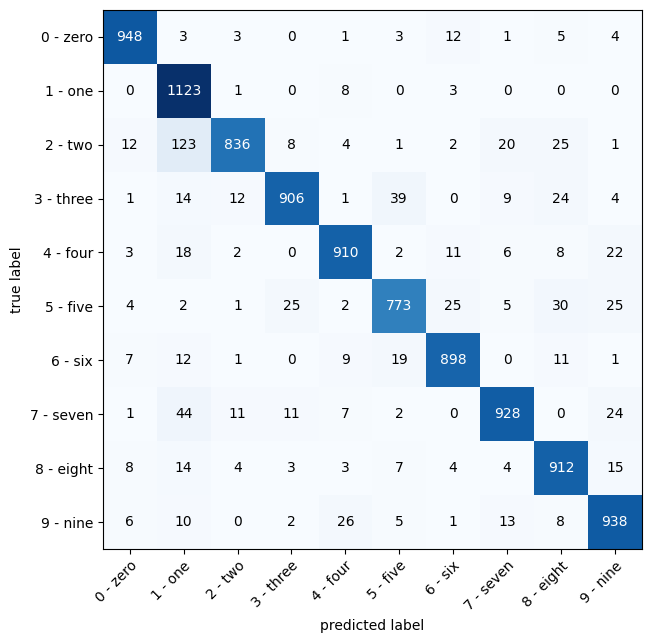

In [259]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))

confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names = class_names,
    figsize = (10, 7)
)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [263]:
def create_conv_layer(kernel_size=3, stride=1, padding=0):
  return nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=kernel_size,
                       stride=stride,
                       padding=0)

In [264]:
torch.manual_seed(42)

KERNEL_SIZE = 3

rand_tensor = torch.rand(size=(1, 3, 64, 64)) #batch, color channel, h, w

In [292]:

output = create_conv_layer()(rand_tensor)
print(f'Original: \t\t{rand_tensor.shape}\n')

print('The image is compressed into a smaller')
output = create_conv_layer(kernel_size=1)(rand_tensor)
print(f"Kernel size: 1: \t{output.shape}")

output = create_conv_layer(kernel_size=5)(rand_tensor)
print(f"Kernel size: 5: \t{output.shape}")

print('\n')
output = create_conv_layer(stride=3)(rand_tensor)
print(f"Stride: 3: \t\t{output.shape}")

output = create_conv_layer(stride=5)(rand_tensor)
print(f"Stride: 5: \t\t{output.shape}")
print('\n')
output = create_conv_layer(padding=1)(rand_tensor)
print(f"Padding: 1: \t\t{output.shape}")

output = create_conv_layer(padding=10)(rand_tensor)
print(f"Padding: 10: \t\t{output.shape}")

Original: 		torch.Size([1, 3, 64, 64])

Kernel size: 1: 	torch.Size([1, 10, 64, 64])
Kernel size: 5: 	torch.Size([1, 10, 60, 60])


Stride: 3: 		torch.Size([1, 10, 21, 21])
Stride: 5: 		torch.Size([1, 10, 13, 13])


Padding: 1: 		torch.Size([1, 10, 62, 62])
Padding: 10: 		torch.Size([1, 10, 62, 62])


While it's true that the ouput feature map has smaller spatial dimensions than the input image, this is primarily due to the absence of padding and the use of a stride of 1, rather than solely because of the increased kernel size.

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [293]:
fashion_train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

fashion_test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None,
)

100%|██████████| 26421880/26421880 [00:01<00:00, 15669172.40it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 274337.08it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4943801.45it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5266409.02it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [294]:
len(fashion_train_data), len(fashion_test_data)

(60000, 10000)

In [295]:
fashion_class_names = fashion_train_data.classes
fashion_class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [296]:
BATCH_SIZE = 32

fashion_train_dataloader = DataLoader(dataset=fashion_train_data,
                                      batch_size=BATCH_SIZE,
                                      shuffle=True)

fashion_test_dataloader = DataLoader(dataset=fashion_test_data,
                                      batch_size=BATCH_SIZE,
                                      shuffle=False)

fashion_train_dataloader, fashion_test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7d229b1885b0>,
 <torch.utils.data.dataloader.DataLoader at 0x7d229b18bfd0>)

In [297]:
# Check out what's inside the training data loader
train_features_batch, train_labels_batch = next(iter(fashion_train_dataloader))

train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [298]:
fashion_model = MNISTModelV0(input_shape=1,
                      hidden_units=10,
                      output_shape=len(fashion_class_names)).to(device)

loss_fn  = nn.CrossEntropyLoss() # using CrossEntropyLoss because this is a multi-class classification model
optimizer = torch.optim.SGD(params=fashion_model.parameters(), lr=0.1) # using Stochastic Gradient Descent
accuracy_fn = MulticlassAccuracy(num_classes=len(fashion_class_names)).to(device)

torch.manual_seed(42)

from timeit import default_timer as timer
start_time_on_gpu = timer()

epochs=5

for epoch in tqdm(range(epochs)):
  print(f"\nEpoch: {epoch}\n----------")

  train_step(model=fashion_model, loss_fn=loss_fn, accuracy_fn=accuracy_fn,
             optimizer=optimizer, data_loader=fashion_train_dataloader,
             device=device)

  test_step(model=fashion_model, loss_fn=loss_fn, accuracy_fn=accuracy_fn,
            data_loader=fashion_test_dataloader, device=device)

end_time_on_gpu = timer()

total_train_on_gpu = print_train_time(start=start_time_on_gpu,
                                        end=end_time_on_gpu,
                                        device=device)

  0%|          | 0/5 [00:00<?, ?it/s]


Epoch: 0
----------

Train loss: 0.60554 | Train acc: 0.74%

Test Loss: 0.39408 | Test acc: 0.80%

Epoch: 1
----------

Train loss: 0.35215 | Train acc: 0.80%

Test Loss: 0.34448 | Test acc: 0.81%

Epoch: 2
----------

Train loss: 0.31356 | Train acc: 0.81%

Test Loss: 0.31998 | Test acc: 0.81%

Epoch: 3
----------

Train loss: 0.29071 | Train acc: 0.81%

Test Loss: 0.32809 | Test acc: 0.80%

Epoch: 4
----------

Train loss: 0.27643 | Train acc: 0.82%

Test Loss: 0.29487 | Test acc: 0.80%
Train time on cuda: 77.182 seconds


In [307]:
# make predictions on gpu model because it's good practice
samples, labels = get_random_samples(count=20, data=fashion_test_data)
pred_probs, pred_classes = make_predictions(model=fashion_model, samples=samples, device=device)
pred_probs, pred_classes

Making predictions....:   0%|          | 0/20 [00:00<?, ?it/s]

(tensor([[3.0754e-09, 2.8063e-08, 2.8204e-09, 3.3280e-10, 1.1518e-08, 6.3648e-06,
          2.4960e-07, 1.0941e-08, 3.1583e-07, 9.9999e-01],
         [1.9906e-03, 2.8620e-05, 1.4478e-05, 9.9757e-01, 1.7831e-05, 1.4675e-07,
          3.7221e-04, 6.2938e-07, 1.1521e-06, 5.9577e-07],
         [5.7867e-02, 5.0108e-05, 3.0356e-01, 1.0572e-03, 3.2876e-03, 1.0652e-05,
          6.0777e-01, 8.5114e-05, 2.0797e-02, 5.5131e-03],
         [5.7619e-04, 3.7041e-06, 9.8996e-05, 3.0824e-04, 2.5237e-04, 9.8538e-01,
          1.3950e-04, 1.0474e-02, 2.6144e-03, 1.5466e-04],
         [2.2503e-05, 9.9996e-01, 1.5732e-07, 1.3734e-05, 4.8468e-06, 1.3119e-06,
          1.9940e-06, 6.1422e-08, 9.7168e-08, 5.5620e-08],
         [1.0268e-05, 4.5885e-06, 2.0080e-06, 6.6640e-04, 4.7069e-05, 7.2014e-01,
          3.3699e-05, 2.7578e-01, 2.8035e-03, 5.0801e-04],
         [3.7184e-05, 1.4803e-05, 9.9644e-06, 6.6789e-04, 6.0567e-05, 2.2396e-02,
          3.8443e-05, 9.7385e-01, 2.0784e-03, 8.4670e-04],
         [4.1

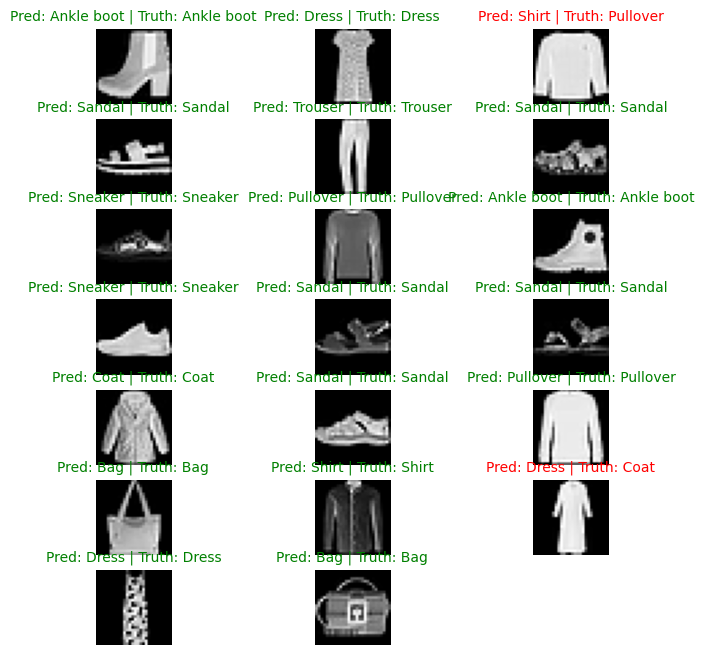

In [311]:
plot_predictions(pred_classes, samples, labels, class_names=fashion_class_names, rows=7, cols=3)

The errors could very well be to mislabling.  The model predicted a shirt when the label was pullover.  But visually the item looks like a shirt.  The same for mistaking the coat as a dress.  The items may look a little too similar.